# Business Understanding

Make this more tailored to my final answer

Our stakholder is a company looking to purchase an aircraft of the lowest potential risk to use for commerical and private enterprises. I am charged with determining which aircraft is the lowest risk to start this new business endeavor. Stakeholders of this project could use this data in selecting to purchase the aircraft with the lowest risk from aviation accident data from 1962 to 2023. I aim to analzying the safest aircraft to purchase, the safest aircraft make to purchase, and finally the safest aircraft model to purchase. Safety in this dataset can be best measured through number of engines, lowest fatal injuries, lowest serious injuries and lowest minor injuries.

# Data Understanding

Redo

This data is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. Each aviation accident has a unique event ID associated with it and contains additional information in each row from the type of aircraft, the make, the model, and any safety and injury metrics to account for. This dataset has 31 columns and 90348 rows. The column datatypes contain 5 floats and 26 objects. For relevance for this project I will clean up the data to include columns worth examining to solve my business understanding problem. Some initial limitations in this dataset include missing values, as only the Investigation.Type column contains the full 90348 rows. I will fill these NaN values based off how I see fit. For example, an NaN for an airplane under Number.of.Engines will be replaced with a 1 as airplanes need at least 1 engine and NaN values for injury counts will be filled with 0.0 as this probably means no injuries were reported.

In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [338]:
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [340]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [341]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [342]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Data Preparation

Clean all columns again

I will only be accounting for airline make and models that are in the United States, so I will be removing any rows that are not the United States. Because I am measuring off of total fatal injuries, total serious injuries, total minor injuries, total uninjured, and injury severity, I will remove unnecessary columns. In addition to this, I'll keep some conditions to track safety. These safety conditions to keep in mind are number of engines, engine type, amateur built, weather condition, and flight level.

The reason I am only viewing the United States crashes is because there is low cardinality and low uniform data. Taking into account only US accidents will still give me a chance to analyze majority of the data in our dataframe.

In [343]:
#First I want to examine all columns in the data
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [344]:
#Creating a dataframe that only shows airplane accidents in the United States
df = df[df['Country'] == 'United States']
df['Country'].value_counts()

United States    82248
Name: Country, dtype: int64

In [345]:
df = df[df['Investigation.Type'] == 'Accident']
df['Investigation.Type'].value_counts()

Accident    79906
Name: Investigation.Type, dtype: int64

In [346]:
df = df[df['Aircraft.Category'] == 'Airplane']
df['Aircraft.Category'].value_counts()

Airplane    23659
Name: Aircraft.Category, dtype: int64

In [347]:
df = df[df['Amateur.Built'] == 'No']
df['Amateur.Built'].value_counts()

No    20564
Name: Amateur.Built, dtype: int64

In [348]:
df = df[df['Number.of.Engines'] != 0.0]
df['Number.of.Engines'].value_counts()

1.0    17554
2.0     2499
4.0       38
3.0       23
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64

In [349]:
# Make all upper case
df['Make'].value_counts().head(10)

CESSNA                4211
Cessna                3399
PIPER                 2474
Piper                 1797
BEECH                  872
Beech                  617
BOEING                 228
MOONEY                 215
AIR TRACTOR INC        214
CIRRUS DESIGN CORP     191
Name: Make, dtype: int64

In [350]:
df['Make'] = df['Make'].str.upper()
df['Make'].value_counts().head(20)

CESSNA                7610
PIPER                 4271
BEECH                 1489
MOONEY                 385
BOEING                 336
BELLANCA               278
GRUMMAN                232
MAULE                  225
AERONCA                224
AIR TRACTOR INC        216
CIRRUS DESIGN CORP     193
AIR TRACTOR            189
CHAMPION               164
LUSCOMBE               162
STINSON                145
NORTH AMERICAN         113
TAYLORCRAFT            109
AERO COMMANDER          95
CIRRUS                  90
DEHAVILLAND             90
Name: Make, dtype: int64

In [351]:
# Our purchaser only trusts data that has over 200 accidents reported
top_10_values = df['Make'].value_counts().head(10).index

df = df[df['Make'].isin(top_10_values)]
df['Make'].value_counts()

CESSNA             7610
PIPER              4271
BEECH              1489
MOONEY              385
BOEING              336
BELLANCA            278
GRUMMAN             232
MAULE               225
AERONCA             224
AIR TRACTOR INC     216
Name: Make, dtype: int64

In [352]:
df = df[df['Engine.Type'] == 'Reciprocating']
df['Engine.Type'].value_counts()

Reciprocating    13448
Name: Engine.Type, dtype: int64

In [353]:
# I will now remove unwanted columns
cols_to_remove = ['Event.Id', 'Accident.Number', 'Event.Date', 'Location', 'Schedule', 'Purpose.of.flight',
                  'Air.carrier', 'Weather.Condition', 'Aircraft.damage','Latitude', 'Longitude', 'Airport.Code',
                  'Airport.Name','Registration.Number', 'FAR.Description', 'Report.Status', 'Publication.Date']
df = df.drop(columns = cols_to_remove)
df.head()

,Investigation.Type,Country,Injury.Severity,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight
7,Accident,United States,Non-Fatal,Airplane,CESSNA,140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,Takeoff
8,Accident,United States,Non-Fatal,Airplane,CESSNA,401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0,Landing
12,Accident,United States,Non-Fatal,Airplane,BELLANCA,17-30A,No,1.0,Reciprocating,0.0,0.0,1.0,0.0,Cruise
13,Accident,United States,Fatal(1),Airplane,CESSNA,R172K,No,1.0,Reciprocating,1.0,0.0,0.0,0.0,Takeoff
15,Accident,United States,Fatal(2),Airplane,BEECH,19,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,Cruise


In [354]:
# Fill NaN values with 0.0 for total fatal/serious/minor and uninjured injuries
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0.0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0.0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0.0)
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(0.0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13448 entries, 7 to 90120
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      13448 non-null  object 
 1   Country                 13448 non-null  object 
 2   Injury.Severity         13438 non-null  object 
 3   Aircraft.Category       13448 non-null  object 
 4   Make                    13448 non-null  object 
 5   Model                   13448 non-null  object 
 6   Amateur.Built           13448 non-null  object 
 7   Number.of.Engines       13320 non-null  float64
 8   Engine.Type             13448 non-null  object 
 9   Total.Fatal.Injuries    13448 non-null  float64
 10  Total.Serious.Injuries  13448 non-null  float64
 11  Total.Minor.Injuries    13448 non-null  float64
 12  Total.Uninjured         13448 non-null  float64
 13  Broad.phase.of.flight   4514 non-null   object 
dtypes: float64(5), object(9)
memory usage:

# Exploratory Data Analysis

First I plan on selecting the safest aircraft category by the number of engines. The more number of engines an aircraft has, the safer it is in flight. I'll create a bar chart that depicts number of engine per aircraft and fill NaN values as 1.0 because it is impossible for airplanes to fly without having at least 1 engine.

Next I plan to examine the ratio of injury counts for each airplane make. The injury categories I'll measure by are total fatal injuries, total serious injuries, total minor injuries, and total uninjured. Visualizing this ratio will tell me which airplane make has the lowest injurity ratio.

Lastly, I'll pick which model of the airplane's make has the lowest injury ratio. This is how I determine which airplane model is the safest to select.

--

Maybe look into best engine to use: based on number of engines, fatality count

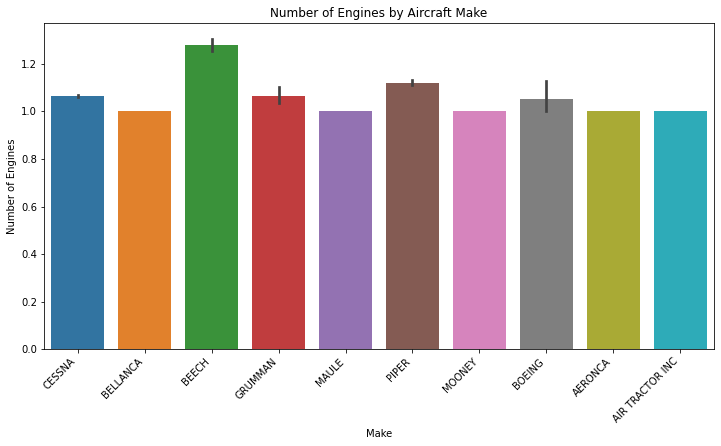

In [355]:
# Plot number of engines per make
plt.figure(figsize=(12, 6))

sns.barplot(x='Make', y='Number.of.Engines', data=df)

plt.title('Number of Engines by Aircraft Make')
plt.xlabel('Make')
plt.ylabel('Number of Engines')

plt.xticks(rotation=45, ha='right')

plt.show()

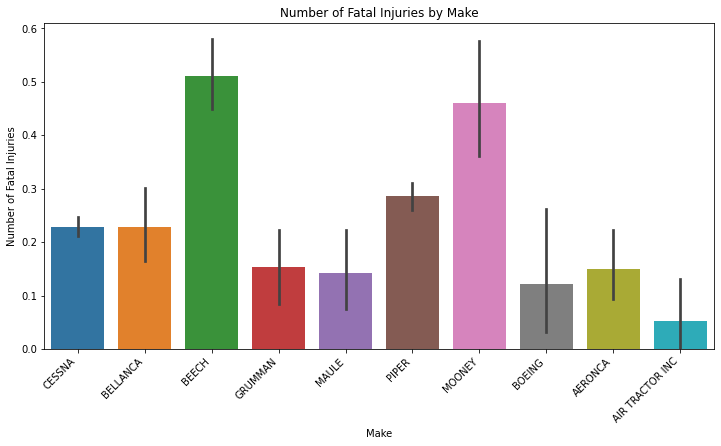

In [367]:
# Plot total fatal injuries by make
plt.figure(figsize=(12, 6))

sns.barplot(x='Make', y='Total.Fatal.Injuries', data=df)

plt.title('Number of Fatal Injuries by Make')
plt.xlabel('Make')
plt.ylabel('Number of Fatal Injuries')

plt.xticks(rotation=45, ha='right')

plt.show()

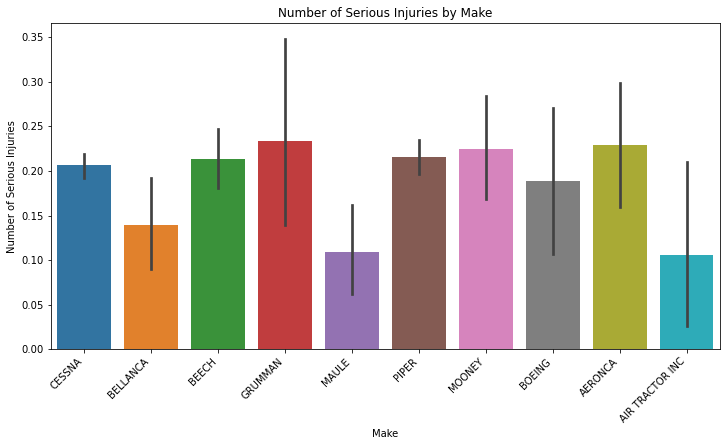

In [368]:
# Plot total serious injuries by make
plt.figure(figsize=(12, 6))

sns.barplot(x='Make', y='Total.Serious.Injuries', data=df)

plt.title('Number of Serious Injuries by Make')
plt.xlabel('Make')
plt.ylabel('Number of Serious Injuries')

plt.xticks(rotation=45, ha='right')

plt.show()

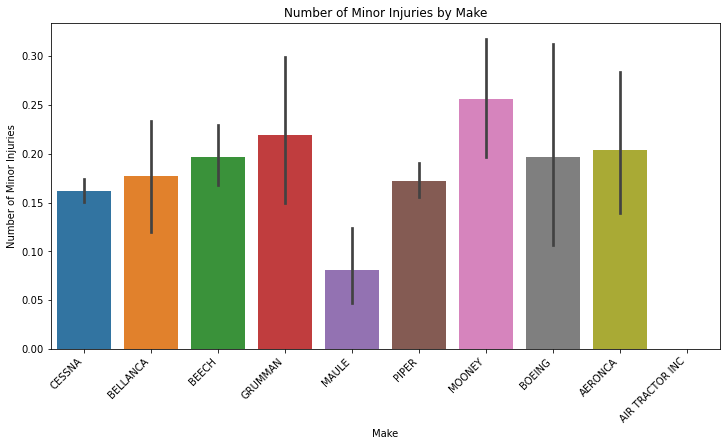

In [369]:
# Plot total minor injuries by make
plt.figure(figsize=(12, 6))

sns.barplot(x='Make', y='Total.Minor.Injuries', data=df)

plt.title('Number of Minor Injuries by Make')
plt.xlabel('Make')
plt.ylabel('Number of Minor Injuries')

plt.xticks(rotation=45, ha='right')

plt.show()

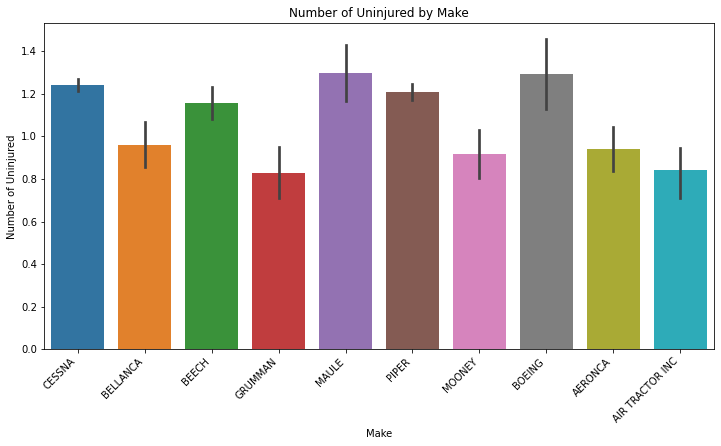

In [370]:
# Plot total uninjured by make
plt.figure(figsize=(12, 6))

sns.barplot(x='Make', y='Total.Uninjured', data=df)

plt.title('Number of Uninjured by Make')
plt.xlabel('Make')
plt.ylabel('Number of Uninjured')

plt.xticks(rotation=45, ha='right')

plt.show()

## Conclusions

This analysis leads to three recommendations for selecting the lowest risk aircraft to purchase.

1) Selecting to purchase an airplane is the lowest risk aircraft category. The airplanes have the highest number of engines on average per aircraft while also keeping mind sample size count. Safety is correlated having a higher number of engines.

2) Of the airplane Makes, the Grumman Make had the lowest risk while keeping in mind a large enough sample size to gather analysis from. The Grumman Make had the lowest fatal and serious injury count ratios of any other airplane Make with a high data count. I weighed having a lower fatal and serious injury ratio greater than minor injuries.

3) Of the Grumman Models, the G-164A model was the lowest risk. This was resulted from looking again at the fatal, serious and minor injury ratios for the top 10 models Grumman produces to analyze from a large enough sample size. I weighed in fatal and serious injuries greater than the minor injury ratio. The G-164A had the lowest ratio in the fatal and serious injury ratios comparative to other Grumman Models.

## Limitations

The first limitation of this study was the criteria in selecting Makes and Models I was analyzing via sample size. I chose to only analyze the Makes and Models based on the top 10 highest counts of each column. I chose this method due to needing a large enough sample size to base my decisions off of. If I were to take into account all Makes and Models in my analysis it would have shown me thousands of rows. I could determine a better method next time in filtering my analysis down.

The second limitation of this study was the missing NaN values. For each NaN value I replaced I based it off of context clues of how I would imagine what an NaN value in the respective column would mean. For example, any NaN value in an injury count column was replaced with 0.0 to indiciate no injuries occurred. I replaced any NaN value in number of engines as 1.0 as airplanes need at least 1 engine to operate. Having no missing values at the start of my data would present me with more accurate findings. 

The last limitation to my study was the columns I was analyzing on. I chose to only analyze US air incidents at the start, it accounted for majoriy of my data, but it does leave out other country incidents in my analysis. I then chose to measure safety by number of engines when there were other categories to explore, such as amateur built, engine type, or weather condition. Then I only looked into the injury counts for fatal, serious and minor to measure the safest airplane Make and Model. Other conditions I could analyze to bring me to my final decision were similar categories in amateur built, engine type, or weather conditions.

## Next Steps

Further analysis could yield additional insights to further improve our selection of the lowest risk aircraft:

1) Better division of injury counts. We have fatal, serious and minor count categories but there can be better division of data to get more specific instances on analyzing each accident's injury count/severity.

2) More data/sample sizes on other aircraft categories to analyze. This data was heavy on the airplane data accidents, it did not give enough additional data to make choices about our other aircraft categories.

3) Including other categories that we can use to measure safety conditions. This modeling could give us a more detailed decision on the aircraft that is the lowest risk to purchase as safety is highly correlated to having a lower risk.